# EDA Project

<div class="alert alert-block alert-info">The EDA project in this course has four main parts to it: <br>
    
1. Project Proposal
2. Phase 1
3. Phase 2
4. Report

This notebook will be used for Project Proposal, Phase 1, and Phase 2. You will have specific questions to answer within this notebook for Project Proposal and Phase 1. You will also continue using this notebook for Phase 2. However, guidance and expectations can be found on Canvas for that assignment. The report is completed outside of this notebook (delivered as a PDF). Detailed instructions for that assignment are provided in Canvas.</div>

<div class="alert alert-block alert-danger"><b><font size=4>Read this before proceeding:</font></b>
    
1. Review the list of data sets and sources of data to avoid before choosing your data. This list is provided in the instructions for the Project Proposal assignment in Canvas.<br><br>  

2. It is expected that when you are asked questions requiring typed explanations you are to use a <b><u>markdown cell</u></b> to type your answers neatly. <b><u><i>Do not provide typed answers to questions as extra comments within your code.</i></u></b> Only provide comments within your code as you normally would, i.e. as needed to explain or remind yourself what each part of the code is doing.</div>

# Project Proposal

<div class="alert alert-block alert-info">The intent of this assignment is for you to share your chosen data file(s) with your instructor and provide general information on your goals for the EDA project.</div>

<div class="alert alert-block alert-success"><b>Step 1 (2 pts)</b>: Give a brief <i><u>description</u></i> of the source(s) of your data and include a <i><u>direct link</u></i> to your data.</div>

##### Question 1

Our source of data is from IMDb (International Movie Database) which is an online database and website for information about movies, television shows, and other streaming content. It is a popular site for people to look up inforamation about ratings, cast, directors, reviews, plot, and any other related information about the content. The 4 datasets we chose to use from their database are the Titles basics, the Ratings data, the crew data, and the name basics. The Titles basics has the name of the media, when and how long it was released or aired, run time, and the genres it belongs to. The Ratings data provides the popularity rating and number of votes of the media title. The crew data provides the IDs for directors and writers. Lastly, the Name basics provides the person's name and primary professions. More information about the data sets can be found here: https://www.imdb.com/interfaces/. The specific data sets for download are found here: https://datasets.imdbws.com/.

<div class="alert alert-block alert-success"><b>Step 2 (2 pts)</b>: Briefly explain why you chose this data.</div>

##### Question 2

Understanding data is a key characteristic to starting statistical analysis. Starting off, our team discussed interests and experiences we might have in common, ultimately agreeing with true crime media. This led us to the IMDb dataset, which we could easily understand given our backgrounds and previous use of the site. Furthermore, we were able to come up with unique questions related to True Crime that we want answered through the analysis of our dataset. While there are analytical reports of IMDb data online, we did not find any analysis related to the questions we came up with. 

Out of this database, the most relevant datasets that we believe could be useful to answer our questions were title.basics, title.ratings, name.basics and title.crew. There are many other databases such as Rotten Tomatoes or Yahoo! Movies, but IMBD allows us to easily read their tsv data files through the pandas library. This is a simple file format to manipulate and extract to dive deep into coding.

<div class="alert alert-block alert-success"><b>Step 3 (1 pt)</b>: Provide a brief overview of your goals for this project.</div>

##### Question 3

We want to understand what drives the popularity of True Crime media, and media in general over time.  Specifically, we would like to be able to prove or disprove some of the following questions by the end of this project:
  * Is it true that True Crime has become more popular over the past five years? 
  * Has there been an increase in the popularity of documentaries in general?
  * Has there been an increase in the volume of documentaries in general?
  * Is there a correlation between the air date of a True Crime TV show or movie and it's popularity? 
  * Are there correlations between the popularity of a genre, specifically True Crime, and the crew?
  
Given these questions, we'll need to import data from IMDb for the title of the production itself, the crew, the names of the crew and the ratings for that production.  We'll need to download the data, clean it (there are many nulls represented by "/N") and join it in order to proceed with answering the above questions.

<div class="alert alert-block alert-success"><b>Step 4 (1 pt)</b>: Read the data into this notebook.</div>

In [2]:
##Import libraries
import sys

import pandas as pd
import urllib.request  # used to retrieve files from the internet
import numpy as np
import re
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

import plotly.offline as py
py.offline.init_notebook_mode(connected=True)

# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
def read_imdb_data(*args):
    '''
    Input a list of urls from imdb's datasets (https://datasets.imdbws.com/) and return a list of dataframes
    '''
    df_list = [] #instantiate a list
    if len(args):    # check to make sure the user input at least one item in the list
        for i in args:                     # for each url:
            filename = i.split('/', 3)[-1] # extract a filename from the url (everything after the 3rd "/" delimeter)
            urllib.request.urlretrieve(i, filename) #retrieve the file from the internet and copy it locally (https://docs.python.org/3/library/urllib.request.html)
            df_list.append(pd.read_csv(filename, compression='gzip', sep='\t', low_memory=False)) 
            # open the local file as a dataframe and append the dataframe to a list 
            # low_memory = False will ensure there no mixed types for the columns.  See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
    else:
        print('No URLs were passed to read_imbd_data()')
    return df_list  #returns a list of dataframes


urls = ['https://datasets.imdbws.com/title.ratings.tsv.gz',
       'https://datasets.imdbws.com/title.crew.tsv.gz',
       'https://datasets.imdbws.com/title.basics.tsv.gz',
       'https://datasets.imdbws.com/name.basics.tsv.gz']  # list of urls from imdb

df_list = read_imdb_data(*urls) # call the function with the list of urls, of any length, and save the dataframes returned

imdb_ratings, imdb_crew, imdb_title_basics, imdb_name = df_list[0], df_list[1], df_list[2], df_list[3] 
# save each dataframe independently so we can explore them

<div class="alert alert-block alert-success"><b>Step 5 (1 pt)</b>: Inspect the data using the <b>info(&nbsp;)</b>, <b>head(&nbsp;)</b>, and <b>tail(&nbsp;)</b> methods.</div>

In [4]:
# Use the info() method to determine to inspect the variable (column) names, the number of non-null values,
#       and the data types for each variable.
imdb_title_basics.info()
imdb_crew.info()
imdb_ratings.info()
imdb_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7706885 entries, 0 to 7706884
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 529.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7706885 entries, 0 to 7706884
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   tconst     object
 1   directors  object
 2   writers    object
dtypes: object(3)
memory usage: 176.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132623 entries, 0 to 1132622
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1132623 non-null  object 
 1   averageRating 

In [5]:
# Use the head() method to inspect the first five (or more) rows of the data
imdb_title_basics.head()
imdb_crew.head()
imdb_ratings.head()
imdb_name.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


,tconst,averageRating,numVotes
0,tt0000001,5.6,1690
1,tt0000002,6.0,210
2,tt0000003,6.5,1433
3,tt0000004,6.1,122
4,tt0000005,6.1,2232


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0031983,tt0050419"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0071877,tt0038355,tt0037382,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0056404,tt0049189,tt0057345,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0077975,tt0072562,tt0080455"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0060827,tt0069467,tt0050976"


In [6]:
# Use the tail() method to inspect the last five (or more) rows of the data
imdb_title_basics.tail()
imdb_crew.tail()
imdb_ratings.tail()
imdb_name.tail()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
7706880,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
7706881,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
7706882,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
7706883,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short
7706884,tt9916880,tvEpisode,Horrid Henry Knows It All,Horrid Henry Knows It All,0,2014,\N,10,"Animation,Comedy,Family"


,tconst,directors,writers
7706880,tt9916848,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
7706881,tt9916850,"nm5519375,nm5519454","nm6182221,nm1628284,nm2921377"
7706882,tt9916852,"nm5519375,nm5519454","nm6182221,nm1628284,nm2921377"
7706883,tt9916856,nm10538645,nm6951431
7706884,tt9916880,nm0996406,"nm1482639,nm2586970"


,tconst,averageRating,numVotes
1132618,tt9916580,7.2,5
1132619,tt9916690,6.6,5
1132620,tt9916720,6.3,73
1132621,tt9916766,6.9,16
1132622,tt9916778,7.5,27


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
10785003,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department",tt2455546
10785004,nm9993716,Essias Loberg,\N,\N,NaN,\N
10785005,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
10785006,nm9993718,Aayush Nair,\N,\N,cinematographer,\N
10785007,nm9993719,Andre Hill,\N,\N,NaN,\N


<div class="alert alert-block alert-danger"><b>STOP HERE for your Project Proposal assignment. Submit your (1) original data file(s) along with (2) the completed notebook up to this point, and (3) the html file for grading and approval.</b></div>

<div class="alert alert-block alert-warning"><b>Instructor Feedback and Approval (3 pts)</b>: Your instructor will provide feedback in either the cell below this or via Canvas. You can expect one of the following point values for this portion.

<b>3 pts</b> - if your project goals and data set are both approved.<br>
<b>2 pts</b> - if your data set is approved but changes to your project goals (Step 3) are needed.<br>
<b>1 pt</b> - if your project goals are approved but your data set is not approved.<br>
<b>0 pts</b> - if neither your data set nor your project goals are approved.<br><br>
    
<i><u>As needed, follow your instructor's feeback and guidance to get on track for the remaining portions of the EDA project.</u></i>
</div>

# EDA Phase 1

<div class="alert alert-block alert-info">The overall goal of this assignment is to take all necessary steps to inspect the quality of your data and prepare the data according to your needs. For information and resources on the process of Exploratory Data Analysis (EDA), you should explore the <b><u>EDA Project Resources Module</u></b> in Canvas.

Once you’ve read through the information provided in that module and have a comfortable understanding of EDA using Python, complete steps 6 through 10 listed below to satisfy the requirements for your EDA Phase 1 assignment. **Remember to convert code cells provided to markdown cells for any typed responses to questions.**</div>

<div class="alert alert-block alert-success"><b>Step 6 (2 pts)</b>: Begin by elaborating in more detail from the previous assignment on why you chose this data?<br>
    
1. Explain what you hope to learn from this data. 
2. Do you have a hunch about what this data will reveal? (The answer to this question will be used in the Introduction section of your EDA report.)
</div>

We hope to learn about the perceived popularity of true crime media in recent years and whether this is driving an increase in true crime documentaries or if there are factors contributing. The sample questions we hope to learn: 

* Is it true that True Crime has become more popular over time?
* Has there been a change in volume of media and/or documentaries in general?
    * Could this just be the result of media content increasing overall?
    * Could this just be the result of documenatires as a genre increasing overall? 
* Has popularity of documentaries changed over time? How does this compare to other genres?
* Is there a correlation between release date and it's popularity?
* Are there correlations between popularity and the crew? For example, is a particular director scoring higher votes and ratings?

Our hunch is that there has been both an increase in volume of media overall and in the genre. However, we believe that the genre is growing faster in popularity over time than other genres.  

<div class="alert alert-block alert-success"><b>Step 7 (2 pts)</b>: Discuss the popluation and the sample:<br>
    
1. What is the population being represented by the data you’ve chosen? 
2. What is the total sample size?
</div>

The total population of our data is the total number of titles regardless of type, if they have a rating, or any other attribute provided. It is representative of all streaming content titles on IMDB.

The sample size we will focus on for our analysis is just the overall number of unique titles for the overall media types, aka not specific tv epsisodes just the overall tv series, and those that have a signficant number of votes to showcase accurate ratings for popularity.

* Starting dataframe row count, directors: 9014736
* Ending dataframe row count, directors: 764306

* Starting dataframe row count, titles: 7634822
* Ending dataframe row count, titles: 575291

By the end of the analysis, we also added two new dataframes specifically for popularity.  Those samples are:
* Ending dataframe row count, directors popularity: 335817
* Ending dataframe row count, titles popularity: 210083

<div class="alert alert-block alert-success"><b>Step 8 (2 pts)</b>: Describe how the data was collected. For example, is this a random sample? Are sampling weights used with the data?</div>

The data that we have researched was provided by IMDB. IMDB is a website that includes many attributes of movies and tv shows. IMBD gathers data through many sources such as movie credits, interviews, press releases, etc. Due to the open nature of the website, a lot of the data is also entered through people in the industry or people visiting the site. To ensure accurate data, IMDB enforces regular quality checks. 

These datasets are not a random sample and no sample weights were used with the data. 


Sources:

https://help.imdb.com/article/imdb/general-information/where-does-the-information-on-imdb-come-from/GGD7NGF5X3ECFKNN?ref_=helpart_nav_24#


<div class="alert alert-block alert-success"><b>Step 9 (4 pts)</b>: In the Project Proposal assignment you used the info(&nbsp;) method to inspect the variables, their data types, and the number of non-null values. Using that information as a guide, provide definitions of each of your variables and their corresponding data types, i.e. a data dictionary. Also indicate which variables will be used for your purposes.</div>

After cleaning up the columns in both dataframes:

In [7]:
titles = {'Variable Name': ['tconst','primaryTitle','startYear','genre', 'nconst', 'averageRating', 'numVotes', 'titleType', 'isTrueCrime'],
        'Data Type': ['string object','string object','string object','string object', 'string object', 'float', 'integer', 'string object', 'boolean'],
        'Definition': ['title ID', 'media title', 'Release Year', 'Genre', 'Name ID', 'media rating', 'media votes', 'type of media', 'whether the title is true crime or not']
        }

title_df = pd.DataFrame(titles, columns = ['Variable Name', 'Data Type', 'Definition'])

title_df

director = {'Variable Name': ['directorName','directorID','tconst','startYear', 'isTrueCrime', 'averageRating', 'numVotes'],
        'Data Type': ['string object','string object','string object','string object', 'boolean', 'float', 'integer'],
        'Definition': ['director''s name', 'director''s id', 'title ID', 'Release Year', 'whether the title is true crime or not', 'media rating', 'media votes']
        }

director_df = pd.DataFrame(director, columns = ['Variable Name', 'Data Type', 'Definition'])

director_df

,Variable Name,Data Type,Definition
0,tconst,string object,title ID
1,primaryTitle,string object,media title
2,startYear,string object,Release Year
3,genre,string object,Genre
4,nconst,string object,Name ID
5,averageRating,float,media rating
6,numVotes,integer,media votes
7,titleType,string object,type of media
8,isTrueCrime,boolean,whether the title is true crime or not


,Variable Name,Data Type,Definition
0,directorName,string object,directors name
1,directorID,string object,directors id
2,tconst,string object,title ID
3,startYear,string object,Release Year
4,isTrueCrime,boolean,whether the title is true crime or not
5,averageRating,float,media rating
6,numVotes,integer,media votes


<div class="alert alert-block alert-success"><b>Step 10 (10 pts)</b>: For full credit in this problem you'll want to <i><u>take all necessary steps to report on the quality of the data</u></i> and <i><u>clean the data accordingly</u></i>. Some things to consider while doing this are listed below. <b>Depending on your data and goals, there may be additional steps needed than those listed here.</b>
    
1. Are there rows with missing or inconsistent values? If so, eliminate those rows from your data where appropriate.
2. Are there any outliers or duplicate rows? If so, eliminate those rows from your data where appropriate. 
At each stage of cleaning the data, state how many rows were eliminated.
3. Are you using all columns (variables) in the data? If not, are you eliminating those columns?
4. Consider some type of visual display such as a boxplot to determine any outliers. Do any outliers need removed? If so, how many were removed?

At each stage of cleaning the data, state how many rows were eliminated. <b><u><i>It is good practice to get the shape of the data before and after each step in cleaning the data and add typed explanations (in separate markdown cells) of the steps taken to clean the data.</i></u></b><br></div>
    
<div class="alert alert-block alert-info">Include the rest of your work below and insert cells where needed.</div>

#### Genre Cleanup - Step 1

* Add a column with a boolean datatype where it's True if the genre field contains both 'documentary' or 'crime', case insensitive
* Count the number of true crime documentaries in the dataset.
* Display the percent of true crime documentaries in the dataset

In [8]:
## Add a column "IsTrueCrime"
imdb_title_basics['isTrueCrime'] = (imdb_title_basics.genres.str.contains('crime', 
                flags=re.IGNORECASE, na=False)) & (imdb_title_basics.genres.str.contains('documentary', 
                flags=re.IGNORECASE, na=False))

In [9]:
TrueCrimeCount = len(imdb_title_basics[imdb_title_basics["isTrueCrime"]])  ## count the number of True items in IsTrueCrime

print(f'The total number of titles in the dataset is {len(imdb_title_basics)}.')

print(f'''The number of True Crime documentaries in the dataset is {TrueCrimeCount}, which is {round(TrueCrimeCount/len(imdb_title_basics), 3)}% of the total titles.''')

The total number of titles in the dataset is 7706885.
The number of True Crime documentaries in the dataset is 20490, which is 0.003% of the total titles.


#### Director Cleanup - Step 2

We're trying to answer: "Are there correlations between popularity and the crew? For example, is a particular director scoring higher votes and ratings?"

We considered breaking out the director column into separate fields, so there was only one director per column.  
First, we checked whether this was practical by checking for the max number of directors in the imdb_crew dataset:

In [10]:
a = 0 # instantiate a
b = 0 # instantiate b

for i in imdb_crew.index:  # loop through the crew table's index
    if len(imdb_crew.directors[i].split(",")) > a: # check to see if the current director count is greater than the last
        a, b = len(imdb_crew.directors[i].split(",")), i # save the director count and index id to a and b

print(f'The title with the most number of directors has an index id of {b} in the crew table and it has {a} directors. See below for more details.')

imdb_title_basics[imdb_title_basics.tconst == imdb_crew.tconst[b]]

The title with the most number of directors has an index id of 423894 in the crew table and it has 463 directors. See below for more details.


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,isTrueCrime
423894,tt0441074,tvSeries,Television Theater,Teatr Telewizji,0,1953,\N,\N,Drama,False


Given that the max number of directors in the dataset is so large (though this could be an outlier), we don't think it's practical to separate them out into separate columns.  Instead we should build a director table consisting of:

* directorName (imdb_name.primaryName)
* directorID (imdb_crew.directors)
* tconst (imdb_crew.tconst)
* startYear (imdb_title_basics.startYear)
* isTrueCrime (imdb_title_basics.IsTrueCrime)
* averageRating (imdb_ratings.averageRating)
* numVotes (imdb_ratings.numVotes)

With this dataset, we can determine whether the average rating, weighted by the number of votes, is positively correlated with the director.  We will also be able to group by whether the titles are True Crime or not.

Next, prepare the data so that we can have a "director" dataframe with a single director per row.  For the directors column, we need the string with the director IDs to be a list.

In [11]:
#Convert the directors column, which is currently a string object, to a list and assign the result to a new column
print(type(imdb_crew.directors[0])) #confirm the type of the directors column

imdb_crew['directors_list'] = imdb_crew['directors'].str.split(',')
# split the directors string into a list and create a new column from it

imdb_crew.tail()

<class 'str'>


,tconst,directors,writers,directors_list
7706880,tt9916848,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377","[nm5519454, nm5519375]"
7706881,tt9916850,"nm5519375,nm5519454","nm6182221,nm1628284,nm2921377","[nm5519375, nm5519454]"
7706882,tt9916852,"nm5519375,nm5519454","nm6182221,nm1628284,nm2921377","[nm5519375, nm5519454]"
7706883,tt9916856,nm10538645,nm6951431,[nm10538645]
7706884,tt9916880,nm0996406,"nm1482639,nm2586970",[nm0996406]


Next "explode" the crew data so that each row is an individual director

In [12]:
directors = imdb_crew.explode('directors_list').drop(columns=['directors', 'writers'], inplace=False)
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html
# this will create a new dataframe where each row is an individual director.  We drop the directors and 
# writers columns

directors.rename(columns={"directors_list": "director"}, inplace = True) 
# rename the directors_list column to "director" since it's no longer a list

directors.tail()

,tconst,director
7706881,tt9916850,nm5519454
7706882,tt9916852,nm5519375
7706882,tt9916852,nm5519454
7706883,tt9916856,nm10538645
7706884,tt9916880,nm0996406


Create the final directors dataframe by merging data from imbd_name, imdb_title_basics and imdb_ratings.  Print the number of shape of the dataframe before and after each merge: use a left merge (`how='left'`) so we can clean the dataframe appropriately later.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

In [13]:
print(f'The original dataframe has a shape of {directors.shape}')

# Merge in the director's name and drop the redundant nconst field
directors = pd.merge(directors, imdb_name[['nconst','primaryName']], left_on = 'director', right_on = 'nconst', how='left').drop(columns=['nconst'], inplace = False)
print(f'After merging in data from the imdb_name dataframe, directors has a shape of {directors.shape}')

# Merge in the IsTrueCrime field
directors = pd.merge(directors, imdb_title_basics[['tconst','isTrueCrime', 'startYear']], on = 'tconst', how='left')
print(f'After merging in data from the imdb_title_basics dataframe, directors has a shape of {directors.shape}')

# Merge in the averageRating and numVotes fields
directors = pd.merge(directors, imdb_ratings[['tconst','averageRating', 'numVotes']], on = 'tconst', how='left')
print(f'After merging in data from the imdb_ratings dataframe, directors has a shape of {directors.shape}')

directors.tail()

The original dataframe has a shape of (9099745, 2)
After merging in data from the imdb_name dataframe, directors has a shape of (9099745, 3)
After merging in data from the imdb_title_basics dataframe, directors has a shape of (9099745, 5)
After merging in data from the imdb_ratings dataframe, directors has a shape of (9099745, 7)


,tconst,director,primaryName,isTrueCrime,startYear,averageRating,numVotes
9099740,tt9916850,nm5519454,Semih Bagci,False,2010,NaN,NaN
9099741,tt9916852,nm5519375,Deniz Yorulmazer,False,2010,NaN,NaN
9099742,tt9916852,nm5519454,Semih Bagci,False,2010,NaN,NaN
9099743,tt9916856,nm10538645,Johan Planefeldt,False,2015,NaN,NaN
9099744,tt9916880,nm0996406,Hilary Audus,False,2014,NaN,NaN


#### Titles Cleanup - Step 3

In this step we will focus on dropping nulls, uncessary columns, and uncessary values in the columns. 

First, we will create a working copy of the title basics called media_titles. Then we will remove the nulls for the titles and genres.

In [14]:
media_titles = imdb_title_basics #Create new table for analysis
media_titles.shape  #This is the original population size

(7706885, 10)

In [15]:
null_ptitles = media_titles[media_titles.primaryTitle.isnull()]
null_ptitles

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,isTrueCrime
1419332,tt10790040,tvEpisode,NaN,NaN,0,2019,\N,\N,\N,False
3913735,tt1971246,tvEpisode,NaN,NaN,0,2011,\N,\N,Biography,False
4006284,tt2067043,tvEpisode,NaN,NaN,0,1965,\N,\N,Music,False
5171779,tt4404732,tvEpisode,NaN,NaN,0,2015,\N,\N,Comedy,False
5780321,tt5773048,tvEpisode,NaN,NaN,0,2015,\N,\N,Talk-Show,False
7025582,tt8473688,tvEpisode,NaN,NaN,0,1987,\N,\N,Drama,False
7057293,tt8541336,tvEpisode,NaN,NaN,0,2018,\N,\N,"Reality-TV,Romance",False
7662830,tt9824302,tvEpisode,NaN,NaN,0,2016,\N,\N,Documentary,False


In [16]:
null_otitles = media_titles[media_titles.originalTitle.isnull()]
null_otitles

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,isTrueCrime
1419332,tt10790040,tvEpisode,NaN,NaN,0,2019,\N,\N,\N,False
3913735,tt1971246,tvEpisode,NaN,NaN,0,2011,\N,\N,Biography,False
4006284,tt2067043,tvEpisode,NaN,NaN,0,1965,\N,\N,Music,False
5171779,tt4404732,tvEpisode,NaN,NaN,0,2015,\N,\N,Comedy,False
5780321,tt5773048,tvEpisode,NaN,NaN,0,2015,\N,\N,Talk-Show,False
7025582,tt8473688,tvEpisode,NaN,NaN,0,1987,\N,\N,Drama,False
7057293,tt8541336,tvEpisode,NaN,NaN,0,2018,\N,\N,"Reality-TV,Romance",False
7662830,tt9824302,tvEpisode,NaN,NaN,0,2016,\N,\N,Documentary,False


In [17]:
media_titles = media_titles.drop(null_ptitles.index)  
media_titles.shape 

(7706877, 10)

This only removed 8 titles. 

In [18]:
null_genres = media_titles[media_titles.genres.isnull()]
media_titles = media_titles.drop(null_genres.index)
media_titles.shape

(7706867, 10)

This ended up removing 10 titles.

In [19]:
media_titles.isnull().sum() #recheck and display the number of missing values in each column

tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
isTrueCrime       0
dtype: int64

After reviewing the results, we noticied there are other values associated as null in our dataset like \N. We will come back to address those. 

Now, we will drop the unnecessary columns for our analysis and merge in the average ratings and number of votes. We did not see use for if the title is for adults, what the end year is, the run time minutes, or what the original title was. This will drop 4 columns, but also add in 2 from the ratings dataset.

In [20]:
media_titles = media_titles.drop(columns=['isAdult','endYear','runtimeMinutes','originalTitle'], inplace=False)
media_titles.info()                                 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7706867 entries, 0 to 7706884
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   tconst        object
 1   titleType     object
 2   primaryTitle  object
 3   startYear     object
 4   genres        object
 5   isTrueCrime   bool  
dtypes: bool(1), object(5)
memory usage: 360.1+ MB


In [21]:
media_titles.shape

(7706867, 6)

In [22]:
#merge the average ratings and votes
media_titles = pd.merge(media_titles, imdb_ratings[['tconst','averageRating', 'numVotes']], on = 'tconst', how='left')

In [23]:
media_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7706867 entries, 0 to 7706866
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   tconst         object 
 1   titleType      object 
 2   primaryTitle   object 
 3   startYear      object 
 4   genres         object 
 5   isTrueCrime    bool   
 6   averageRating  float64
 7   numVotes       float64
dtypes: bool(1), float64(2), object(5)
memory usage: 477.7+ MB


Next, we will remove titles that are out of scope for analysis. We will not be looking at individual TV epsiodes, audiobooks, radio series', video games, or other episodes. 

In [24]:
media_titles.titleType.value_counts()

tvEpisode       5598798
short            799600
movie            571227
video            298104
tvSeries         203372
tvMovie          130496
tvMiniSeries      36311
tvSpecial         31793
videoGame         27549
tvShort            9614
radioSeries           1
episode               1
audiobook             1
Name: titleType, dtype: int64

In [25]:
#remove tvEpisodes,videogame,radioSeries,audiobook,episode becasue they aren't relevant. For example, tvEpisode is just a subset of a tvSeries.

indextype1 = media_titles[media_titles.titleType == 'episode'].index
media_titles = media_titles.drop(indextype1)

indextype2 = media_titles[media_titles.titleType == 'audiobook'].index
media_titles = media_titles.drop(indextype2)

indextype3 = media_titles[media_titles.titleType == 'radioSeries'].index
media_titles = media_titles.drop(indextype3)

indextype4 = media_titles[media_titles.titleType == 'videoGame'].index
media_titles = media_titles.drop(indextype4)

indextype5 = media_titles[media_titles.titleType == 'tvEpisode'].index
media_titles = media_titles.drop(indextype5)


In [26]:
media_titles.titleType.value_counts()

short           799600
movie           571227
video           298104
tvSeries        203372
tvMovie         130496
tvMiniSeries     36311
tvSpecial        31793
tvShort           9614
Name: titleType, dtype: int64

In [27]:
media_titles.shape #From 7631524 to 2067987

(2080517, 8)

This dropped 5,563,537 titles from our media titles dataframe.

#### Remove Null Values - Step 4

Now we will re-address the additional null values. To account for them, we need to covert all of the `\N` values to null. We chose to drop all nulls from our directors and media_titles dataframes instead of imputing because after reviewing a sample of the data, a majority of the nulls were for title types that were not relevant to our analysis anyway. For example, TV episodes with missing directors. We also believe the most popular mainstream media is populated on IMDB which will be represented in our data analysis.


In [28]:
# first convert '/N' to nulls. Then grab the total number of null values after coversion
directors.shape # dataframe shape as a starting point
((directors.isnull())).sum() # count of nulls we start with 

directors.replace(to_replace = '\\N', value = np.NaN, inplace=True) # replace all '/N' strings with NaN
(directors.isnull()).sum() # we see the count of nulls increase

directors.dropna(inplace=True) #drop all the rows with a null value (NaN)

(directors.isnull()).sum() # we see the count of nulls go to zero
directors.shape # we see a decrease from 9010972 rows to 1266176 due to all the missing data

(9099745, 7)

tconst                 0
director               0
primaryName      3276221
isTrueCrime            0
startYear              0
averageRating    7650488
numVotes         7650488
dtype: int64

tconst                 0
director         3276174
primaryName      3276221
isTrueCrime            0
startYear         886799
averageRating    7650488
numVotes         7650488
dtype: int64

tconst           0
director         0
primaryName      0
isTrueCrime      0
startYear        0
averageRating    0
numVotes         0
dtype: int64

(1275226, 7)

For our directors table, we deleted 7,744,796 rows that all had missing information. 

In [29]:
# first convert '/N' to nulls as well. Then grab the total number of null values after coversion
# titles table - conversion
media_titles.shape # dataframe shape as a starting point
((media_titles.isnull())).sum()# count of nulls we start with 

media_titles.replace(to_replace = '\\N', value = np.NaN, inplace=True) # replace all '/N' strings with NaN
(media_titles.isnull()).sum() # we see the count of nulls increase

media_titles.dropna(inplace=True) #drop all the rows with a null value (NaN)

(media_titles.isnull()).sum() # we see the count of nulls go to zero
media_titles.shape # we see a decrease from 2067987 rows to 576250 due to all the missing data

(2080517, 8)

tconst                 0
titleType              0
primaryTitle           0
startYear              0
genres                 0
isTrueCrime            0
averageRating    1483841
numVotes         1483841
dtype: int64

tconst                 0
titleType              0
primaryTitle           0
startYear         112286
genres            114483
isTrueCrime            0
averageRating    1483841
numVotes         1483841
dtype: int64

tconst           0
titleType        0
primaryTitle     0
startYear        0
genres           0
isTrueCrime      0
averageRating    0
numVotes         0
dtype: int64

(579072, 8)

We now have 576,250 titles in our media_titles data set. We dropped 1,491,737 titles due to their missing data.

#### Check for duplicates - Step 5 
Now, we will check for duplicates.

In [30]:
media_titles.head()
duplicate_media_titles = media_titles.duplicated('tconst')
duplicate_media_titles.value_counts()

,tconst,titleType,primaryTitle,startYear,genres,isTrueCrime,averageRating,numVotes
0,tt0000001,short,Carmencita,1894,"Documentary,Short",False,5.6,1690.0
1,tt0000002,short,Le clown et ses chiens,1892,"Animation,Short",False,6.0,210.0
2,tt0000003,short,Pauvre Pierrot,1892,"Animation,Comedy,Romance",False,6.5,1433.0
3,tt0000004,short,Un bon bock,1892,"Animation,Short",False,6.1,122.0
4,tt0000005,short,Blacksmith Scene,1893,"Comedy,Short",False,6.1,2232.0


False    579072
dtype: int64

In [31]:
directors.head()
duplicate_dir_tconst = directors.duplicated(subset=['tconst'])
duplicate_dir_tconst.value_counts() #313642 duplicate titles in the directors table

,tconst,director,primaryName,isTrueCrime,startYear,averageRating,numVotes
0,tt0000001,nm0005690,William K.L. Dickson,False,1894,5.6,1690.0
1,tt0000002,nm0721526,Émile Reynaud,False,1892,6.0,210.0
2,tt0000003,nm0721526,Émile Reynaud,False,1892,6.5,1433.0
3,tt0000004,nm0721526,Émile Reynaud,False,1892,6.1,122.0
4,tt0000005,nm0005690,William K.L. Dickson,False,1893,6.1,2232.0


False    958624
True     316602
dtype: int64

In [32]:
duplicate_dir_director = directors.duplicated(subset=['director'])
duplicate_dir_director.value_counts() #1019989 duplicate directors in the directors table

True     1027983
False     247243
dtype: int64

In [33]:
duplicate_dir_both = directors.duplicated()
duplicate_dir_both.value_counts() #no duplicate rows in directors table

False    1275226
dtype: int64

There were no duplicate titles in our media_titles dataset. As expected, we see duplicate titles in the directors dataset because a director can direct for multiple movies. Likewise, we see multiple titles because movies can have more than one director. However, we do not see any duplicate rows in the directors table.



#### Drop titles from the directors that aren't in the media_titles dataframe - Step 6

We're using media_titles as our primary dataframe for analysis.  The directors dataframe should only include titles that are also included in our primary dataframe so any comparisons between the two are done on the same set of titles.

In [34]:
#https://stackoverflow.com/questions/3462143/get-difference-between-two-lists
directors.shape
director_titles = directors.tconst.tolist()
media_titles_titles = media_titles.tconst.tolist()                      
excess_director_titles = set(director_titles) - set(media_titles_titles)
# returns a list of title IDs that are in director_titles, but not in media_titles_titles
len(excess_director_titles)  # tells us how many "extra" titles are in directors
directors = directors[~directors.tconst.isin(excess_director_titles)] 
# returns a list of titles that are not in excess_director_titles
directors.shape

(1275226, 7)

415541

(769273, 7)

#### Outliers and a Valid Number of Ratings based on Volatility - Step 7

##### Outliers and Boxplots

Boxplots don't tell us much about the data - higher numbers of votes appear as outliers, but these are actually values that are worth keeping.  There are many more titles with few votes than there are titles with many. See charts below.

Similarly, boxplots on rating don't tell us much either - it's an ordinal scale that is useful for comparison, but we cannot tell anything concrete from the values themselves. In other words, we don't know anything about whether the differences in ratings actually correspond to anything meanful to the title they represent to actually be able to throw out outliers for the averageRating column.

In [35]:
fig = px.box(directors.sample(n=10000, random_state=1), y="numVotes", points="all", title='Directors Boxplot - Number of Votes')
fig.show()

fig = px.box(media_titles.sample(n=10000, random_state=1), y="numVotes", points="all", title='Media Titles Boxplot - Number of Votes')
fig.show()

##### Volatility and a minimum threshold for number of votes

We expect volatility for the rating of a title to be high when the number of votes is low.  We measure volatility on a sample of the data to determine an approximate minimum threshold for the number of votes to assume a reliable rating.   

Outliers on the other end of the numVotes column, i.e. movies with extremely high volumes of ratings, are not considered invalid - for this dataset we assume that the more rating there are, the better the averageRating.


Helpful articles:
1. https://www.bazaarvoice.com/blog/many-reviews-take-achieve-meaningful-average-rating/
2. https://pbpython.com/pandas-qcut-cut.html <- if we wanted to split our dataframes into equal-sized quartiles instead of sampling

In [36]:
media_titles['numVotes'].describe().apply(lambda x: format(x, 'f')) 
# describe the data (but not with scientific notation)

count     579072.000000
mean        1723.309879
std        22399.493523
min            5.000000
25%           10.000000
50%           25.000000
75%          114.000000
max      2361810.000000
Name: numVotes, dtype: object

In [37]:
media_titles_sample = media_titles.sample(n=10000, random_state=1).copy()  # take a sample of the media titles dataframe
media_titles_sample = media_titles_sample.sort_values(by=['numVotes']).set_index(['numVotes']) # sort the dataframe by the number of votes
media_titles_sample['pct_change_rating'] = media_titles_sample.averageRating.pct_change() # caluculate a rolling percent change on the same
# this will tell us for each subsequent row, how much the averageRating changed.  Higher values here indicate volatility
media_titles_sample.reset_index(inplace=True)
fig = px.line(media_titles_sample, x='numVotes', y='pct_change_rating', title='Rating Volatility by Number of Votes')
fig.show()

Zooming in on the above chart roughly indicates that around 50 votes is a good threshold to use to ensure we're able to measure popularity properly.

Therefore, we created two new dataframes specifically for popularity from the directors and media titles dataframes, dropping any titles with less than 50 votes.

In [38]:
directors_before = directors.shape
print(f'Before dropping titles with less than 9000 votes there were {directors.shape[0]} records in the directors dataframe')
directors_popularity = directors[directors['numVotes'] > 50].copy()
print(f'After dropping titles with less than 9000 votes there were {directors_popularity.shape[0]} records in the new directors_popularity dataframe')

print(f'Before dropping titles with less than 9000 votes there were {media_titles.shape[0]} records in the directors dataframe')
media_titles_popularity = media_titles[media_titles['numVotes'] > 50].copy()
print(f'After dropping titles with less than 9000 votes there were {media_titles_popularity.shape[0]} records in the new media_titles_popularity dataframe')

Before dropping titles with less than 9000 votes there were 769273 records in the directors dataframe
After dropping titles with less than 9000 votes there were 337839 records in the new directors_popularity dataframe
Before dropping titles with less than 9000 votes there were 579072 records in the directors dataframe
After dropping titles with less than 9000 votes there were 211355 records in the new media_titles_popularity dataframe


By dropping records with less than 50 votes, how many True Crime Titles are left?

In [39]:
media_titles[media_titles.isTrueCrime].shape
media_titles_popularity[media_titles_popularity.isTrueCrime].shape

(1388, 8)

(691, 8)

What are the shapes of the dataframes we end up with?

In [40]:
directors.shape
media_titles.shape
directors_popularity.shape
media_titles_popularity.shape

(769273, 7)

(579072, 8)

(337839, 7)

(211355, 8)

#### Export the Data - Step 7

In [41]:
directors.to_csv('directors.csv',index=False)
media_titles.to_csv('media_titles.csv',index=False)
directors_popularity.to_csv('directors_popularity.csv',index=False)
media_titles_popularity.to_csv('media_titles_popularity.csv',index=False)

<div class="alert alert-block alert-danger"><b>STOP HERE for your EDA Phase 1 assignment. Submit your <i><u>cleaned</u></i> data file along with the completed notebook up to this point for grading.</b></div>

# EDA Phase 2

<div class="alert alert-block alert-info">All of your work for the EDA Phase 2 assignment will begin below here. Refer to the detailed instructions and expectations for this assignment in Canvas.</div>

### __Has there been a change in volume of True Crime documentaries over time?__

Create a time series chart from the media_titles dataframe, with the x axis being years and the y being the count of titles.  Each year should have a single bar representing the count of True Crime titles.

_Assumptions:_
  * IMDB is _comprehensive_, meaning it has all the titles we need to truly get a count of titles for True Crime media.  We have already cleaned the data and dropped many titles, so we can only use this data to approximately _compare the years_ to each other.

In [42]:
media_titles.sort_values(by='startYear', inplace=True)
true_crime_titles = media_titles[media_titles.isTrueCrime]
fig = px.histogram(true_crime_titles, x='startYear')

fig.update_layout(
    title="True Crime Documentaries Over Time (IMDb)",
    xaxis_title="Year",
    yaxis_title="Count of True Crime Titles",
    font=dict(
        family="Times New Roman",
        size=14,
        color="Green"
    )
)

This histogram tells us that there has been a definitive increase in True Crime Titles since around 2010.

### __Could this just be the result of media content increasing overall?__

Create a time series stacked bar chart from the media_titles dataframe, with the x axis being years and the y being the count of titles.  Part of the stack should be all media titles, and the remaining is specific to true crime.

 _Assumptions:_
  * IMDB is _comprehensive_, meaning it has all the titles we need to truly get a count of titles, both overall and for True Crime media.  We have already cleaned the data and dropped many titles, so we can only use this data to approximately _compare the years_ to each other.

In [43]:
media_titles_count = media_titles.groupby(['startYear', 'isTrueCrime'])['tconst'].count().reset_index()
fig = px.bar(media_titles_count, x="startYear", y="tconst", color='isTrueCrime')


fig.update_layout(
    title="Media Titles Over Time (IMDb)",
    xaxis_title="Year",
    yaxis_title="Count of Media Titles",
    font=dict(
        family="Times New Roman",
        size=14,
        color="Green"
    )
)

This does show that media titles have increased overall in the last decade (peaking around 2017), which appears to be the same pattern as we saw in the previous chart.  We can see True Crime is a tiny fraction of overall media titles, though they are highly correlated by year:

In [44]:
media_titles.groupby(['startYear']).agg({'tconst': 'count', 'isTrueCrime': 'sum'}).corr(method ='pearson') 

,tconst,isTrueCrime
tconst,1.000000,0.911722
isTrueCrime,0.911722,1.000000


Are there other genre's that make up a bigger piece of the overall pie?

In [45]:
# Get the unique genres from the genres column
media_titles['genres_list'] = media_titles['genres'].str.split(',')
genres = media_titles.explode('genres_list').genres_list.unique()
genres

array(['Documentary', 'Short', 'Animation', 'Sport', 'Action', 'Comedy',
       'Romance', 'Music', 'Drama', 'Western', 'History', 'Crime',
       'Sci-Fi', 'News', 'Horror', 'Biography', 'Fantasy', 'Family',
       'War', 'Adventure', 'Mystery', 'Musical', 'Adult', 'Thriller',
       'Film-Noir', 'Game-Show', 'Talk-Show', 'Reality-TV'], dtype=object)

In [46]:
genre_title_count = {}
for i in genres:
    count = 0
    count = sum([count + 1 for x in media_titles.genres_list if i in x])
    genre_title_count[i] = count
print(genre_title_count)
fig = px.pie(values=genre_title_count.values(), names=genre_title_count.keys())
fig.update_layout(title_text='Media Titles by Genre')

{'Documentary': 87441, 'Short': 146149, 'Animation': 36637, 'Sport': 8577, 'Action': 43572, 'Comedy': 142735, 'Romance': 45552, 'Music': 34898, 'Drama': 198169, 'Western': 5707, 'History': 13598, 'Crime': 35981, 'Sci-Fi': 15843, 'News': 3255, 'Horror': 33911, 'Biography': 13344, 'Fantasy': 18958, 'Family': 29388, 'War': 8161, 'Adventure': 28702, 'Mystery': 17697, 'Musical': 9486, 'Adult': 18240, 'Thriller': 31815, 'Film-Noir': 782, 'Game-Show': 3156, 'Talk-Show': 4316, 'Reality-TV': 9142}


True Crime is a combination of both the Documentaries and Crime genres.  Of the individual genres, "Drama" is the most prevalent in the dataset. Much of the data here overlaps: we have titles which are both "Action" and "Comedy", for example.

### __Could this just be the result of documentaries as a genre increasing overall?__

We've already seen that overall media titles are increasing, but are titles that include the term "Documentary" also increasing? They are 8.36% of the total overall title count.  

In [47]:
genres_by_year = {} # initiate the dictionary

for genres_title in genres:
    title_count_timeseries = {} # initiate a temp dictionary
    #for i in start_year_range:
    for i in range(1990, 2020):
        count = 0 # restart the count for every year
        count = sum([count + 1 for x in media_titles[media_titles.startYear == str(i)].genres_list if genres_title in x])
        title_count_timeseries[i] = count # create a temp dictionary consisting of years as the key and count of titles as the value
    genres_by_year[genres_title] = title_count_timeseries

#add in true crime and the overall title count by year
title_count_timeseries = {} # initiate a temp dictionary again
for i in range(1990, 2020):
    count = 0 # restart the count for every year
    count = sum([count + 1 for x in media_titles[media_titles.startYear == str(i)].genres_list if 'Documentary' in x and 'Crime' in x])
    title_count_timeseries[i] = count # create a temp dictionary consisting of years as the key and count of titles as the value
genres_by_year['True Crime'] = title_count_timeseries


In [48]:
genres_by_year.keys()  ## list the genre types in genres_by_year

dict_keys(['Documentary', 'Short', 'Animation', 'Sport', 'Action', 'Comedy', 'Romance', 'Music', 'Drama', 'Western', 'History', 'Crime', 'Sci-Fi', 'News', 'Horror', 'Biography', 'Fantasy', 'Family', 'War', 'Adventure', 'Mystery', 'Musical', 'Adult', 'Thriller', 'Film-Noir', 'Game-Show', 'Talk-Show', 'Reality-TV', 'True Crime'])

In [49]:
def genre_chart(genre):
    '''
    Creates a plotly bar chart for the given genre
    Accepts as it's first argument:
    'Documentary' 'Short' 'Animation' 'Sport' 'Action' 'Comedy' 'Romance'
    'Music' 'Drama' 'Western' 'News' 'History' 'Crime' 'Sci-Fi' 'Family'
    'Fantasy' 'Horror' 'Biography' 'War' 'Adventure' 'Mystery' 'Musical'
    'Adult' 'Thriller' 'Film-Noir' 'Talk-Show' 'Game-Show' 'Reality-TV'
    
    For years between 1990 and 2020
    '''
    fig = go.Figure()
    
    #fig = px.line(x=list(genres_by_year[genre].keys()), y=list(genres_by_year[genre].values()))
    
    fig.add_trace(go.Scatter(x=list(genres_by_year[genre].keys()), y=list(genres_by_year[genre].values()),
                    mode='lines', name=f'{genre}'));
    
    fig.add_trace(go.Scatter(x=list(genres_by_year['True Crime'].keys()), y=list(genres_by_year['True Crime'].values()),
                    mode='lines', name='True Crime'));
    
    fig.update_layout(
        title=f"{genre} Titles Over Time (IMDb)",
        xaxis_title="Year",
        yaxis_title="Count of Media Titles",
        legend_title="Genres",
        font=dict(
            family="Times New Roman",
            size=14,
            color="Green"
        )
    );
    return fig.show()

genre_chart('Documentary')

It's obvious now that True Crime is a very small subset, even of only the documentaries genre itself.  From the previous charts, it's also clear that media content has grown quite a bit in general, including documentaries (and True Crime) since around year 2000. Documentaries is increasing overall, but this isn't an abnormal trend.

### How does Drama, the genre with the biggest portion of all titles, compare to "True Crime"? What about just "Crime"?

In [50]:
genre_chart('Drama')
genre_chart('Crime')

Drama dwarfs True Crime in volume. Crime and True Crime are a little easier to compare because they are closer in volume, and they both appear to have increased similarly since 2005.

__Are there any genres that have actually _decreased_ in terms of count of releases, overall, since 2000?__

We'll compare the year 2000 to 2019 (given that Covid-19 may have impacted the number of releases in 2020)

In [51]:
for i in genres_by_year.keys():
    if genres_by_year[i][2019] - genres_by_year[i][2000] > -1:
        print(f'INCREASE: {i} went from {genres_by_year[i][2000]} in 2000 to {genres_by_year[i][2019]} in 2019.')
    else: 
        print(f'DECREASE: {i} went from {genres_by_year[i][2000]} in 2000 to {genres_by_year[i][2019]} in 2019.')

INCREASE: Documentary went from 1413 in 2000 to 3603 in 2019.
INCREASE: Short went from 2026 in 2000 to 5020 in 2019.
INCREASE: Animation went from 563 in 2000 to 1036 in 2019.
INCREASE: Sport went from 148 in 2000 to 311 in 2019.
INCREASE: Action went from 607 in 2000 to 1318 in 2019.
INCREASE: Comedy went from 1881 in 2000 to 4003 in 2019.
INCREASE: Romance went from 718 in 2000 to 1282 in 2019.
INCREASE: Music went from 666 in 2000 to 1449 in 2019.
INCREASE: Drama went from 2601 in 2000 to 6681 in 2019.
INCREASE: Western went from 21 in 2000 to 60 in 2019.
INCREASE: History went from 152 in 2000 to 476 in 2019.
INCREASE: Crime went from 566 in 2000 to 1185 in 2019.
INCREASE: Sci-Fi went from 195 in 2000 to 607 in 2019.
INCREASE: News went from 34 in 2000 to 65 in 2019.
INCREASE: Horror went from 388 in 2000 to 1623 in 2019.
INCREASE: Biography went from 180 in 2000 to 489 in 2019.
INCREASE: Fantasy went from 304 in 2000 to 675 in 2019.
INCREASE: Family went from 442 in 2000 to 637 i

It looks like the "Adult" genre has been the only genre to see  decrease since 2000.

### Are there other genres that are increasing more than others since 2000?

In [52]:
biggest_increase_percent = 0
biggest_increase_cnt = 0
for i in genres_by_year.keys():
    _2019 = genres_by_year[i][2019]
    _2000 = genres_by_year[i][2000]
    try:
        if _2019 - _2000 > -1:
            print(f'{i} INCREASED {round(((_2019 - _2000)/_2000)*100, 2)}% between 2000 and 2019.')
            if round(((_2019 - _2000)/_2000)*100, 2) > biggest_increase_percent: 
                biggest_increase_percent, bg_inc_genre = round(((_2019 - _2000)/_2000)*100,2), i 
            if (_2019 - _2000) > biggest_increase_cnt: 
                biggest_increase_cnt, bg_inc_genre_cnt = _2019 - _2000, i  
        else: 
            print(f'{i} DECREASED {round(((_2019 - _2000)/_2000 )*100, 2)}% between 2000 and 2019.')
    except ZeroDivisionError:
        print(f'{i} had zero titles in 2019. Cannot divide by zero.')

print("-"*70)
print(f'By percent, the genre with the biggest increase was {bg_inc_genre}, at {biggest_increase_percent}%')
print(f'By title count, the genre with the biggest increase was {bg_inc_genre_cnt}, at {biggest_increase_cnt} titles')

Documentary INCREASED 154.99% between 2000 and 2019.
Short INCREASED 147.78% between 2000 and 2019.
Animation INCREASED 84.01% between 2000 and 2019.
Sport INCREASED 110.14% between 2000 and 2019.
Action INCREASED 117.13% between 2000 and 2019.
Comedy INCREASED 112.81% between 2000 and 2019.
Romance INCREASED 78.55% between 2000 and 2019.
Music INCREASED 117.57% between 2000 and 2019.
Drama INCREASED 156.86% between 2000 and 2019.
Western INCREASED 185.71% between 2000 and 2019.
History INCREASED 213.16% between 2000 and 2019.
Crime INCREASED 109.36% between 2000 and 2019.
Sci-Fi INCREASED 211.28% between 2000 and 2019.
News INCREASED 91.18% between 2000 and 2019.
Horror INCREASED 318.3% between 2000 and 2019.
Biography INCREASED 171.67% between 2000 and 2019.
Fantasy INCREASED 122.04% between 2000 and 2019.
Family INCREASED 44.12% between 2000 and 2019.
War INCREASED 51.11% between 2000 and 2019.
Adventure INCREASED 142.81% between 2000 and 2019.
Mystery INCREASED 217.81% between 2000

### Is it true that True Crime has become more popular over time?

First we are going to look at the trend of the average rating and the sum of votes for titles by year. In looking at the general statistics, the mean is a good representation of the average ratings across all titles and we will use the sum of the number of votes.

Our assumption is that the definition is popularity is based on the averageRating and the total of the numVotes.

In [53]:
not_tc_index = media_titles_popularity[media_titles_popularity.isTrueCrime == False].index
tc_popularity = media_titles_popularity.drop(not_tc_index)

tc_popularity.head()

,tconst,titleType,primaryTitle,startYear,genres,isTrueCrime,averageRating,numVotes
47836,tt0048702,short,Teenagers on Trial,1955,"Crime,Documentary,Short",True,5.1,127.0
66123,tt0067456,movie,The Murder of Fred Hampton,1971,"Biography,Crime,Documentary",True,7.6,267.0
67554,tt0068918,movie,Manson,1973,"Biography,Crime,Documentary",True,7.3,933.0
76580,tt0078205,movie,Scared Straight!,1978,"Crime,Documentary",True,7.8,746.0
91074,tt0093099,short,Going Equipped,1990,"Animation,Crime,Documentary",True,6.2,99.0


In [54]:
tc_popularity.describe()

,averageRating,numVotes
count,691.000000,691.000000
mean,7.176411,2600.700434
std,0.921974,9380.090446
min,2.000000,51.000000
25%,6.800000,102.000000
50%,7.300000,245.000000
75%,7.700000,1106.000000
max,9.500000,139988.000000


In [55]:
#drop 2021 because it is not a full year
tc_popularity.shape

incomplete_year_index = tc_popularity[tc_popularity.startYear == '2021'].index
tc_popularity = tc_popularity.drop(incomplete_year_index)

tc_popularity.shape

(691, 8)

(680, 8)

Text(0.5, 1.0, 'True Crime Average Rating by Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Average Rating')

Text(0, 0.5, '# of Titles')

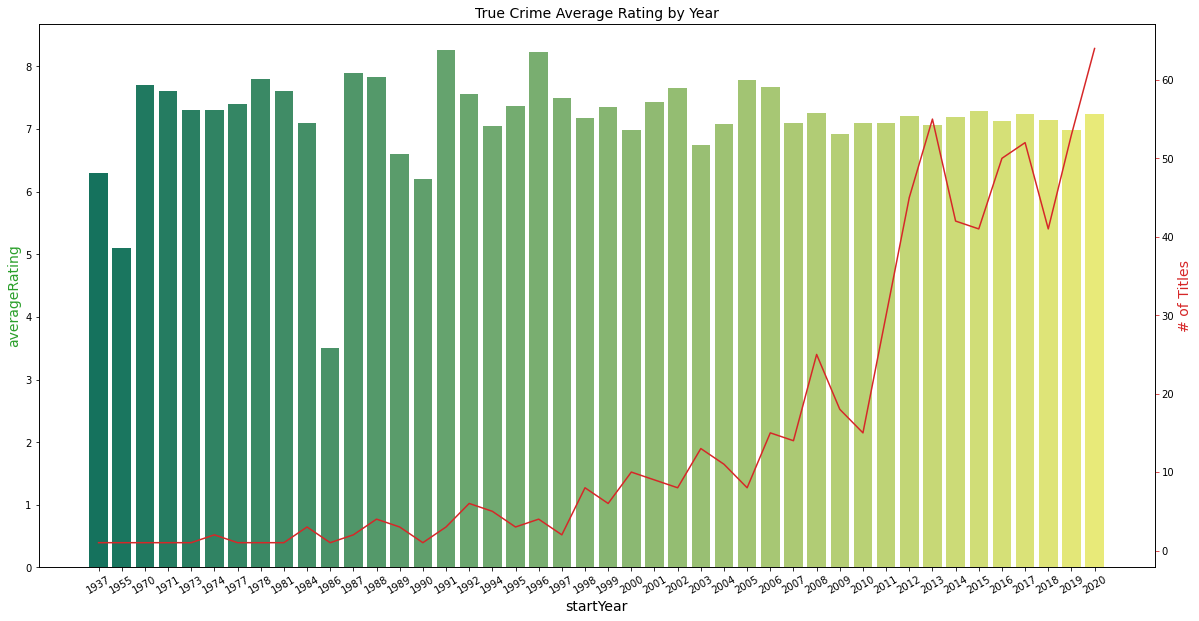

In [56]:
tc_popularity_year = tc_popularity.groupby(['startYear'])['averageRating'].mean().reset_index()

tc_titles_year = tc_popularity.groupby(['startYear'])['tconst'].count().reset_index()


#Create combo chart
fig, ax1 = plt.subplots(figsize=(20,10))
color = 'tab:green'
#bar plot creation
ax1.set_title('True Crime Average Rating by Year', fontsize=14)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Average Rating', fontsize=14, color = color)
ax1 = sns.barplot(x='startYear', y='averageRating', data = tc_popularity_year, palette='summer')
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation = 30)
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('# of Titles', fontsize=14, color=color)
ax2 = sns.lineplot(x='startYear', y='tconst', data = tc_titles_year, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

Text(0.5, 1.0, 'True Crime # of Votes by Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of Votes')

Text(0, 0.5, '# of Titles')

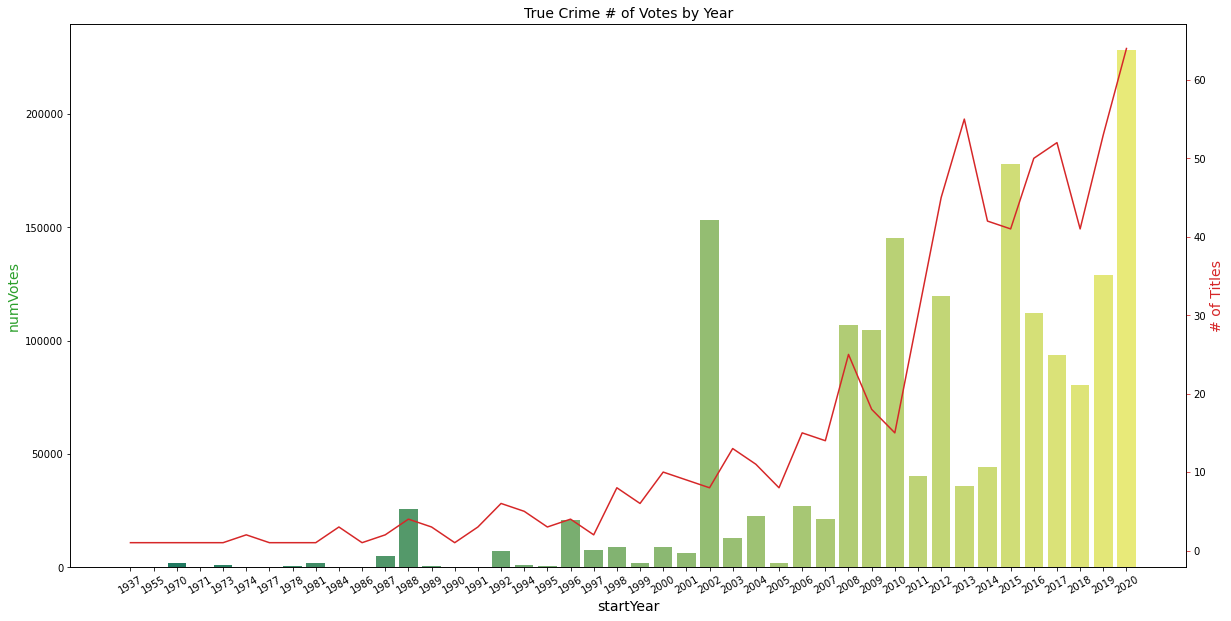

In [57]:
tc_votes_year = tc_popularity.groupby(['startYear'])['numVotes'].sum().reset_index()

tc_titles_year = tc_popularity.groupby(['startYear'])['tconst'].count().reset_index()


#Create combo chart
fig, ax1 = plt.subplots(figsize=(20,10))
color = 'tab:green'
#bar plot creation
ax1.set_title('True Crime # of Votes by Year', fontsize=14)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Number of Votes', fontsize=14, color = color)
ax1 = sns.barplot(x='startYear', y='numVotes', data = tc_votes_year, palette='summer')
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation = 30)
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('# of Titles', fontsize=14, color=color)
ax2 = sns.lineplot(x='startYear', y='tconst', data = tc_titles_year, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()


These figures show that true crime titles have not increased the average rating over time, even though the volume of true crime titles has increased. 

However, the number of votes looks very inconsistent. There is a spike in 2002, 2010, 2015, and 2020. This could be due to particular titles. We will investigate specific titles in more detail below.




### Has popularity of documentaries changed over time?

In [58]:
ddc = media_titles_popularity
ddc.head(15)

#drop 2021 because it is not a full year
ddc.shape

incomp_year_index = ddc[ddc.startYear == '2021'].index
ddc = ddc.drop(incomp_year_index)

ddc.shape

#Creating a dataframe for Documentaries only
ddc['isDocumentary'] = (ddc.genres.str.contains('Documentary',flags=re.IGNORECASE, na=False))
not_doc_index = ddc[ddc.isDocumentary == False].index
doc_popularity = ddc.drop(not_doc_index)

doc_popularity.head()   

#Creating a dataframe for Comedy only
ddc['isComedy'] = (ddc.genres.str.contains('Comedy',flags=re.IGNORECASE, na=False))
not_c_index = ddc[ddc.isComedy == False].index
c_popularity = ddc.drop(not_c_index)

c_popularity.head()

#Creating a dataframe for Drama only
ddc['isDrama'] = (ddc.genres.str.contains('Drama',flags=re.IGNORECASE, na=False))
not_d_index = ddc[ddc.isDrama == False].index
d_popularity = ddc.drop(not_d_index)

d_popularity.head()

,tconst,titleType,primaryTitle,startYear,genres,isTrueCrime,averageRating,numVotes
0,tt0000001,short,Carmencita,1894,"Documentary,Short",False,5.6,1690.0
1,tt0000002,short,Le clown et ses chiens,1892,"Animation,Short",False,6.0,210.0
2,tt0000003,short,Pauvre Pierrot,1892,"Animation,Comedy,Romance",False,6.5,1433.0
3,tt0000004,short,Un bon bock,1892,"Animation,Short",False,6.1,122.0
4,tt0000005,short,Blacksmith Scene,1893,"Comedy,Short",False,6.1,2232.0
5,tt0000006,short,Chinese Opium Den,1894,Short,False,5.3,123.0
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,1894,"Short,Sport",False,5.4,684.0
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,1894,"Documentary,Short",False,5.4,1868.0
8,tt0000009,short,Miss Jerry,1894,"Romance,Short",False,6.0,155.0
9,tt0000010,short,Leaving the Factory,1895,"Documentary,Short",False,6.9,6248.0


(211355, 8)

(210654, 8)

,tconst,titleType,primaryTitle,startYear,genres,isTrueCrime,averageRating,numVotes,isDocumentary
0,tt0000001,short,Carmencita,1894,"Documentary,Short",False,5.6,1690.0,True
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,1894,"Documentary,Short",False,5.4,1868.0,True
9,tt0000010,short,Leaving the Factory,1895,"Documentary,Short",False,6.9,6248.0,True
10,tt0000011,short,Akrobatisches Potpourri,1895,"Documentary,Short",False,5.2,280.0,True
11,tt0000012,short,The Arrival of a Train,1896,"Documentary,Short",False,7.4,10745.0,True


,tconst,titleType,primaryTitle,startYear,genres,isTrueCrime,averageRating,numVotes,isDocumentary,isComedy
2,tt0000003,short,Pauvre Pierrot,1892,"Animation,Comedy,Romance",False,6.5,1433.0,False,True
4,tt0000005,short,Blacksmith Scene,1893,"Comedy,Short",False,6.1,2232.0,False,True
13,tt0000014,short,The Waterer Watered,1895,"Comedy,Short",False,7.1,4784.0,False,True
31,tt0000033,short,Trick Riding,1895,"Comedy,Documentary,Short",False,5.6,878.0,True,True
33,tt0000035,short,Watering the Flowers,1896,"Comedy,Short",False,5.5,56.0,False,True


,tconst,titleType,primaryTitle,startYear,genres,isTrueCrime,averageRating,numVotes,isDocumentary,isComedy,isDrama
34,tt0000036,short,Awakening of Rip,1896,"Drama,Short",False,4.4,510.0,False,False,True
74,tt0000076,short,Exit of Rip and the Dwarf,1896,"Drama,Short",False,4.5,450.0,False,False,True
106,tt0000108,short,Rip Leaving Sleepy Hollow,1896,"Drama,Short",False,4.4,462.0,False,False,True
109,tt0000111,short,Rip's Toast,1896,"Drama,Short",False,4.5,467.0,False,False,True
111,tt0000113,short,Rip's Twenty Years' Sleep,1896,"Drama,Short",False,4.3,469.0,False,False,True


Text(0.5, 1.0, 'Documentary Average Rating by Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Average Rating')

Text(0, 0.5, '# of Titles')

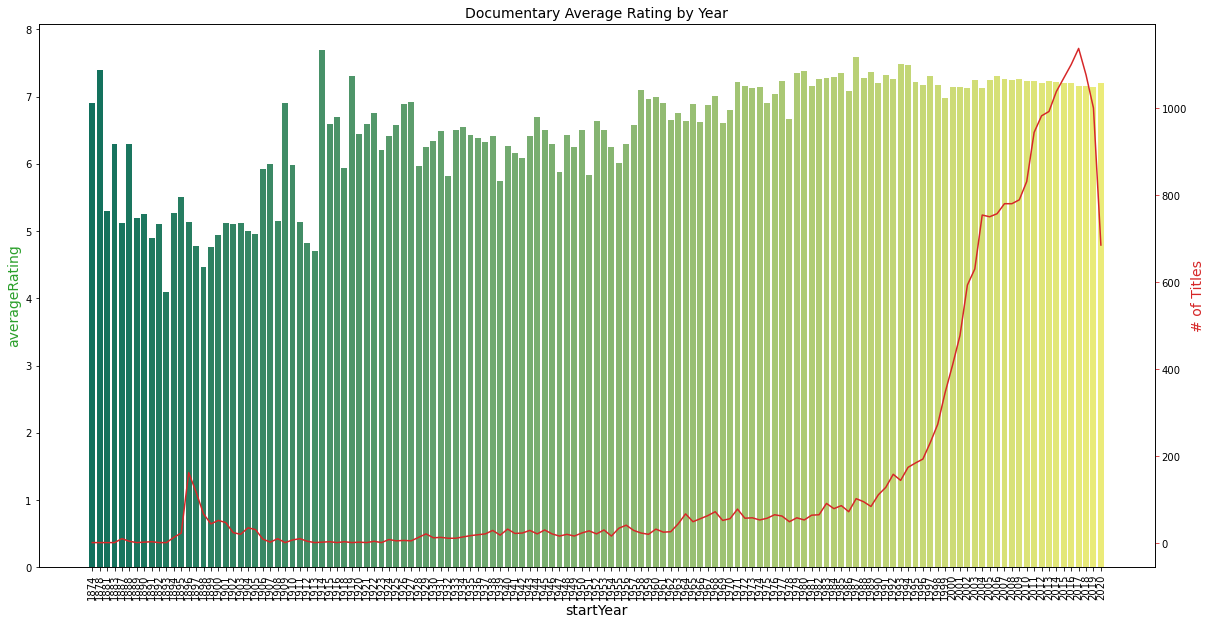

Text(0.5, 1.0, 'Documentary # of Votes by Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of Votes')

Text(0, 0.5, '# of Titles')

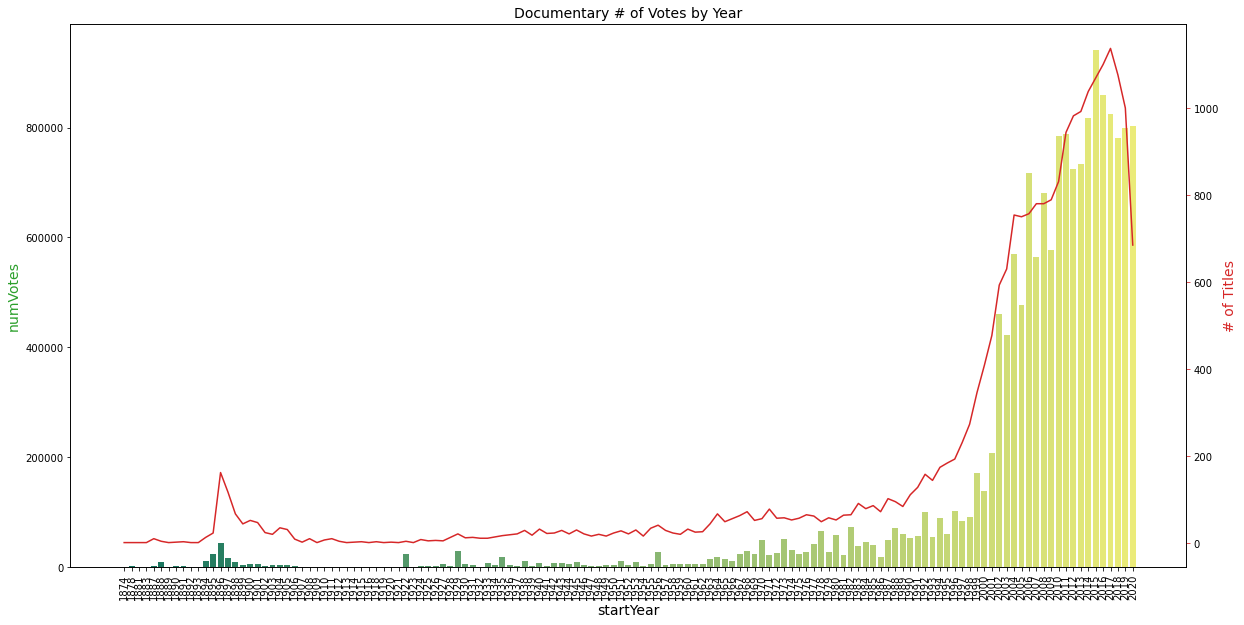

In [59]:
doc_popularity_year = doc_popularity.groupby(['startYear'])['averageRating'].mean().reset_index()

doc_titles_year = doc_popularity.groupby(['startYear'])['tconst'].count().reset_index()

#Create combo chart
fig, ax1 = plt.subplots(figsize=(20,10))
color = 'tab:green'
#bar plot creation
ax1.set_title('Documentary Average Rating by Year', fontsize=14)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Average Rating', fontsize=14, color = color)
ax1 = sns.barplot(x='startYear', y='averageRating', data = doc_popularity_year, palette='summer')
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation = 90)
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('# of Titles', fontsize=14, color=color)
ax2 = sns.lineplot(x='startYear', y='tconst', data = doc_titles_year, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

doc_votes_year = doc_popularity.groupby(['startYear'])['numVotes'].sum().reset_index()

#Create combo chart
fig, ax1 = plt.subplots(figsize=(20,10))
color = 'tab:green'
#bar plot creation
ax1.set_title('Documentary # of Votes by Year', fontsize=14)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Number of Votes', fontsize=14, color = color)
ax1 = sns.barplot(x='startYear', y='numVotes', data = doc_votes_year, palette='summer')
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation = 90)
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('# of Titles', fontsize=14, color=color)
ax2 = sns.lineplot(x='startYear', y='tconst', data = doc_titles_year, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

These figures show that documentaries have also not increased the average rating over time, even though the volume of documentary titles have increased.

However, the number of votes looks very consistent as you would expect. As the number of titles increases, the total number of votes increases because the size of the pie gets larger.

In [61]:
d_popularity.shape

incomplete_year_index2 = d_popularity[d_popularity.startYear == '2021'].index
d_popularity = d_popularity.drop(incomplete_year_index2)

d_popularity.shape

(88348, 11)

(88348, 11)

### How does this compare to other genres?

Text(0.5, 1.0, 'Drama Average Rating by Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Average Rating')

Text(0, 0.5, '# of Titles')

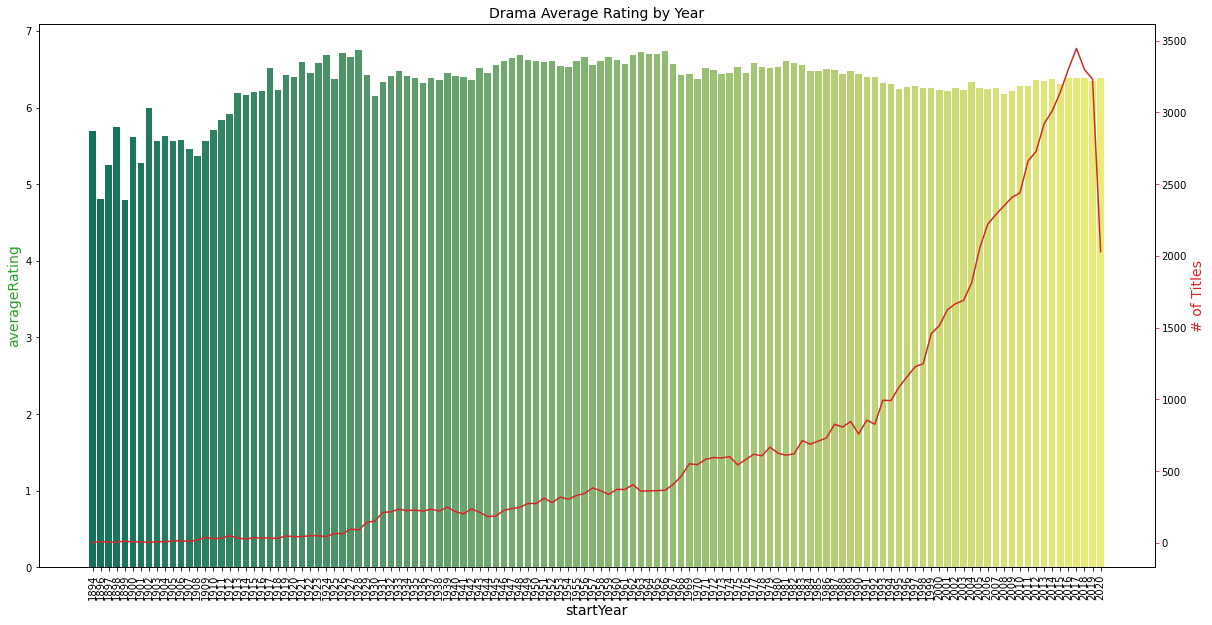

Text(0.5, 1.0, 'Drama # of Votes by Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of Votes')

Text(0, 0.5, '# of Titles')

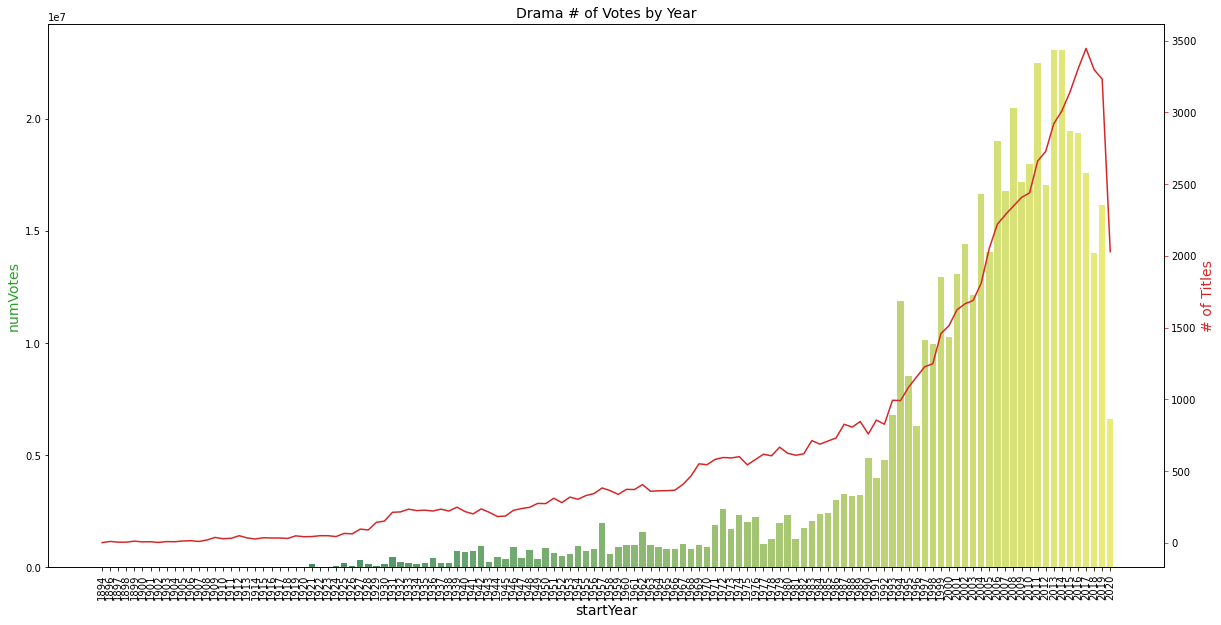

In [62]:
d_popularity_year = d_popularity.groupby(['startYear'])['averageRating'].mean().reset_index()

d_titles_year = d_popularity.groupby(['startYear'])['tconst'].count().reset_index()

#Create combo chart
fig, ax1 = plt.subplots(figsize=(20,10))
color = 'tab:green'
#bar plot creation
ax1.set_title('Drama Average Rating by Year', fontsize=14)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Average Rating', fontsize=14, color = color)
ax1 = sns.barplot(x='startYear', y='averageRating', data = d_popularity_year, palette='summer')
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation = 90)
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('# of Titles', fontsize=14, color=color)
ax2 = sns.lineplot(x='startYear', y='tconst', data = d_titles_year, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

d_votes_year = d_popularity.groupby(['startYear'])['numVotes'].sum().reset_index()

#Create combo chart
fig, ax1 = plt.subplots(figsize=(20,10))
color = 'tab:green'
#bar plot creation
ax1.set_title('Drama # of Votes by Year', fontsize=14)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Number of Votes', fontsize=14, color = color)
ax1 = sns.barplot(x='startYear', y='numVotes', data = d_votes_year, palette='summer')
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation = 90)
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('# of Titles', fontsize=14, color=color)
ax2 = sns.lineplot(x='startYear', y='tconst', data = d_titles_year, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

Text(0.5, 1.0, 'Comedy Average Rating by Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Average Rating')

Text(0, 0.5, '# of Titles')

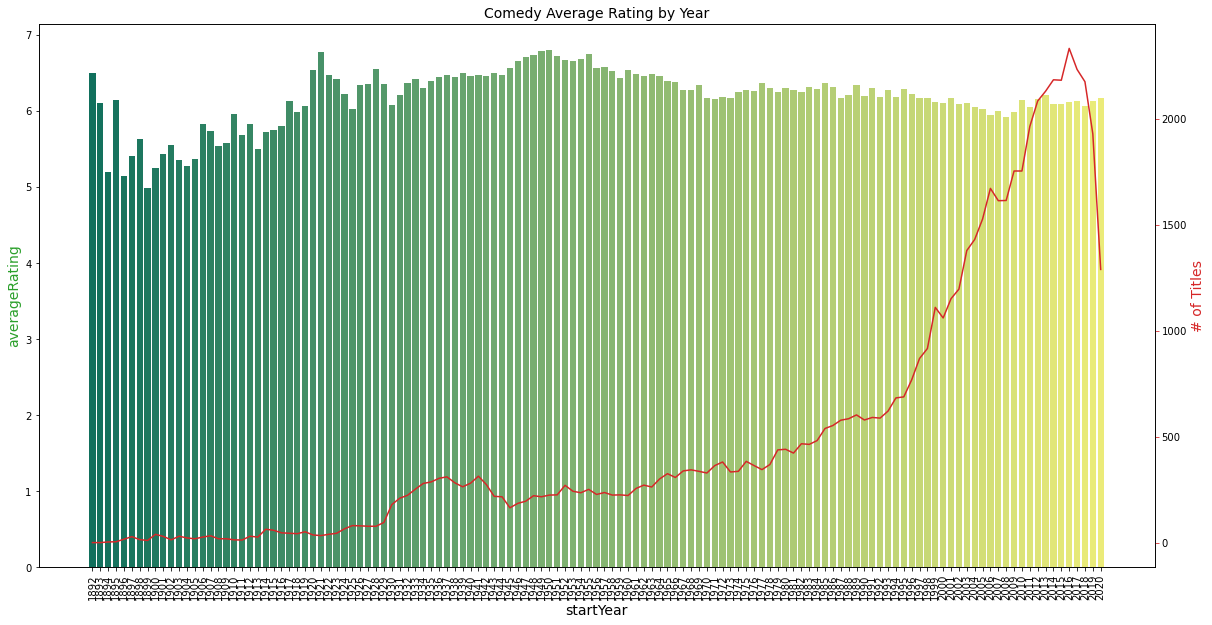

Text(0.5, 1.0, 'Comedy # of Votes by Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of Votes')

Text(0, 0.5, '# of Titles')

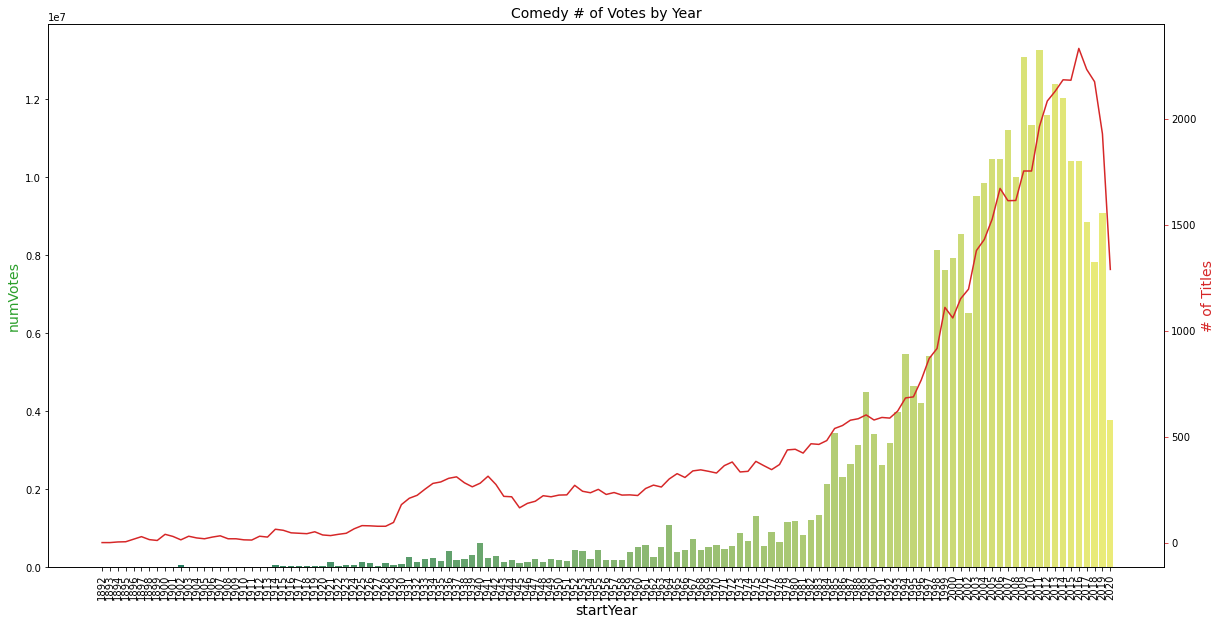

In [60]:
c_popularity_year = c_popularity.groupby(['startYear'])['averageRating'].mean().reset_index()

c_titles_year = c_popularity.groupby(['startYear'])['tconst'].count().reset_index()

#Create combo chart
fig, ax1 = plt.subplots(figsize=(20,10))
color = 'tab:green'
#bar plot creation
ax1.set_title('Comedy Average Rating by Year', fontsize=14)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Average Rating', fontsize=14, color = color)
ax1 = sns.barplot(x='startYear', y='averageRating', data = c_popularity_year, palette='summer')
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation = 90)
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('# of Titles', fontsize=14, color=color)
ax2 = sns.lineplot(x='startYear', y='tconst', data = c_titles_year, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

c_votes_year = c_popularity.groupby(['startYear'])['numVotes'].sum().reset_index()

#Create combo chart
fig, ax1 = plt.subplots(figsize=(20,10))
color = 'tab:green'
#bar plot creation
ax1.set_title('Comedy # of Votes by Year', fontsize=14)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Number of Votes', fontsize=14, color = color)
ax1 = sns.barplot(x='startYear', y='numVotes', data = c_votes_year, palette='summer')
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation = 90)
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('# of Titles', fontsize=14, color=color)
ax2 = sns.lineplot(x='startYear', y='tconst', data = c_titles_year, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

With Drama and Comedy genres, we are seeing a similar trend. The average rating doesn't change significantly over time. We are seeing that as the # of titles increases, the sum of votes increases. Again, this logically makes sense because the more titles the more titles available to vote on. 

However, this further indicates that there could be specific titles in True Crime driving the perceived increase in popularity. 

### Is there a correlation between release date and it's popularity?

Based on the above, we did not need to build a heatmap to review the correlation between year and popularity because it is not driving any trend. Instead we will focus on discovery for true crime titles that are driving the spikes in votes.


### What are the most popular titles?

In [61]:
media_titles_popularity.shape

titles_group = media_titles_popularity.groupby(media_titles_popularity['primaryTitle']).agg({"averageRating":"mean", "numVotes":"sum"})
titles_sort = titles_group.sort_values(by=['numVotes'], ascending = False)[:50]
titles_sort.style.background_gradient(cmap = 'YlGn') 


(210773, 8)

,averageRating,numVotes
primaryTitle,,
The Shawshank Redemption,9.300000,2357774.000000
The Dark Knight,6.750000,2317567.000000
Inception,8.850000,2081206.000000
Fight Club,8.800000,1866214.000000
Pulp Fiction,8.900000,1837582.000000
Forrest Gump,8.800000,1822110.000000
Game of Thrones,9.300000,1778119.000000
The Matrix,8.700000,1686819.000000
The Lord of the Rings: The Fellowship of the Ring,8.800000,1671162.000000


In looking at this list, we choose  1,053,000 total vote as a good representation for the averageRating score for popularity.

In [62]:
titles_group2 = titles_group[titles_group['numVotes'] > 1050000.0]
titles_sort2 = titles_group2.sort_values(by=['averageRating', 'numVotes'], ascending = False)[:50]
titles_sort2.style.background_gradient(cmap = 'YlGn') 

,averageRating,numVotes
primaryTitle,,
Breaking Bad,9.500000,1474094.000000
The Shawshank Redemption,9.300000,2357774.000000
Game of Thrones,9.300000,1778119.000000
The Godfather: Part II,9.000000,1137214.000000
Pulp Fiction,8.900000,1837582.000000
The Lord of the Rings: The Return of the King,8.900000,1651734.000000
Schindler's List,8.900000,1220238.000000
Inception,8.850000,2081206.000000
Fight Club,8.800000,1866214.000000


Looking at the titles that pop for the highest number of votes, but also high ratings. Game of Thrones, Shawshank Redemption, and Breaking Bad are the most popular. This makes sense based on common knowledge of these shows and movies. They happen to be some of our team's favorites. 

Now we will specifically looking at True crime titles.

In [63]:
tc_popularity.head()
tc_popularity.shape

tc_group = tc_popularity.groupby(tc_popularity['primaryTitle']).agg({"averageRating":"mean", "numVotes":"sum"})
tc_sort = tc_group.sort_values(by=['numVotes'], ascending = False)[:100]
tc_sort.style.background_gradient(cmap = 'YlGn') 

,tconst,titleType,primaryTitle,startYear,genres,isTrueCrime,averageRating,numVotes
47837,tt0048702,short,Teenagers on Trial,1955,"Crime,Documentary,Short",True,5.1,127.0
66124,tt0067456,movie,The Murder of Fred Hampton,1971,"Biography,Crime,Documentary",True,7.6,265.0
67555,tt0068918,movie,Manson,1973,"Biography,Crime,Documentary",True,7.3,931.0
76581,tt0078205,movie,Scared Straight!,1978,"Crime,Documentary",True,7.8,746.0
91075,tt0093099,short,Going Equipped,1990,"Animation,Crime,Documentary",True,6.2,99.0


(678, 8)

,averageRating,numVotes
primaryTitle,,
Bowling for Columbine,7.900000,139934.000000
Making a Murderer,8.600000,87013.000000
Inside Job,8.200000,70070.000000
Tiger King,7.600000,66741.000000
Exit Through the Gift Shop,8.000000,62539.000000
Man on Wire,7.700000,52852.000000
The Cove,8.400000,47339.000000
The Imposter,7.500000,45444.000000
Capitalism: A Love Story,7.400000,41194.000000


Since we have a much smaller scope of titles (686) that are True Crime, we will define that to be popular it has to have at least 10,000 total number of votes.

In [64]:
tc_group2 = tc_group[tc_group['numVotes'] > 10000.0]
tc_sort2 = tc_group2.sort_values(by=['averageRating'], ascending = False)[:10]
tc_sort2.style.background_gradient(cmap = 'YlGn') 

,averageRating,numVotes
primaryTitle,,
Content Cop,8.900000,11982.000000
O.J.: Made in America,8.900000,17687.000000
The Jinx: The Life and Deaths of Robert Durst,8.700000,39659.000000
Making a Murderer,8.600000,87013.000000
The Defiant Ones,8.500000,11816.000000
Dear Zachary: A Letter to a Son About His Father,8.500000,33527.000000
The Cove,8.400000,47339.000000
13th,8.300000,32226.000000
Paradise Lost: The Child Murders at Robin Hood Hills,8.300000,15356.000000


This is our top 10 most popular True Crime titles. All with an average rating greater than or equal to 8.2.

Now, we will specifically look at what titles were in 2002, 2010, 2015, and 2020 that could have caused the spikes in number of votes.

In [65]:
#Create dataframes for 2002, 2010, 2015, and 2020

tc_popularity.shape
tc_popularity.head()

year2002 = tc_popularity[tc_popularity.startYear == '2002']
year2002.shape

year2010 = tc_popularity[tc_popularity.startYear == '2010']
year2010.shape

year2015 = tc_popularity[tc_popularity.startYear == '2015']
year2015.shape

year2020 = tc_popularity[tc_popularity.startYear == '2020']
year2020.shape


(678, 8)

,tconst,titleType,primaryTitle,startYear,genres,isTrueCrime,averageRating,numVotes
47837,tt0048702,short,Teenagers on Trial,1955,"Crime,Documentary,Short",True,5.1,127.0
66124,tt0067456,movie,The Murder of Fred Hampton,1971,"Biography,Crime,Documentary",True,7.6,265.0
67555,tt0068918,movie,Manson,1973,"Biography,Crime,Documentary",True,7.3,931.0
76581,tt0078205,movie,Scared Straight!,1978,"Crime,Documentary",True,7.8,746.0
91075,tt0093099,short,Going Equipped,1990,"Animation,Crime,Documentary",True,6.2,99.0


(8, 8)

(15, 8)

(41, 8)

(64, 8)

In [66]:
tc_group2002 = year2002.groupby(year2002['primaryTitle']).agg({"averageRating":"mean", "numVotes":"sum"})
tc_sort2002 = tc_group2002.sort_values(by=['numVotes'], ascending = False)[:5]
tc_sort2002.style.background_gradient(cmap = 'YlGn') 

,averageRating,numVotes
primaryTitle,,
Bowling for Columbine,7.900000,139934.000000
Bus 174,7.800000,7897.000000
Biggie & Tupac,6.800000,4560.000000
The True Story of Killing Pablo,7.400000,305.000000
Animal Cops: Detroit,6.900000,163.000000


In 2002, Bowling for Columbine had a high number of votes indicated it as one of the most popular titles that year. However, it's average Rating doesn't qualify this title into our top 10. 

In [67]:
tc_group2010 = year2010.groupby(year2010['primaryTitle']).agg({"averageRating":"mean", "numVotes":"sum"})
tc_sort2010 = tc_group2010.sort_values(by=['numVotes'], ascending = False)[:5]
tc_sort2010.style.background_gradient(cmap = 'YlGn') 

,averageRating,numVotes
primaryTitle,,
Inside Job,8.200000,70070.000000
Exit Through the Gift Shop,8.000000,62539.000000
Tabloid,7.000000,6637.000000
Monster: The Josef Fritzl Story,4.900000,1730.000000
"Drugs, Inc.",7.800000,1267.000000


In 2010, Inside Job and Exit Through the Gift Shop had the highest number of votes. Inside Job is our 10th most popular True Crime title. 

In [68]:
tc_group2015 = year2015.groupby(year2015['primaryTitle']).agg({"averageRating":"mean", "numVotes":"sum"})
tc_sort2015 = tc_group2015.sort_values(by=['numVotes'], ascending = False)[:5]
tc_sort2015.style.background_gradient(cmap = 'YlGn') 

,averageRating,numVotes
primaryTitle,,
Making a Murderer,8.600000,87013.000000
The Jinx: The Life and Deaths of Robert Durst,8.700000,39659.000000
Content Cop,8.900000,11982.000000
Soaked in Bleach,7.400000,11121.000000
The Fear of 13,7.600000,6928.000000


In 2015, Making a Murder, The Jinx: The Life and Deaths of Robert Durst, Content Cop, and Soaked in Bleach had a significant total number of votes. The first 3 are all in our top 10 as well with high averateRatings.

In [69]:
tc_group2020 = year2020.groupby(year2020['primaryTitle']).agg({"averageRating":"mean", "numVotes":"sum"})
tc_sort2020 = tc_group2020.sort_values(by=['numVotes'], ascending = False)[:8]
tc_sort2020.style.background_gradient(cmap = 'YlGn') 

,averageRating,numVotes
primaryTitle,,
Tiger King,7.600000,66741.000000
American Murder: The Family Next Door,7.200000,18740.000000
Jeffrey Epstein: Filthy Rich,7.100000,18015.000000
Killer Inside: The Mind of Aaron Hernandez,7.400000,13484.000000
The Dissident,8.100000,11729.000000
The Trials of Gabriel Fernandez,8.200000,8230.000000
Unsolved Mysteries,7.300000,7525.000000
Athlete A,7.700000,7513.000000


Lastly, there are 5 titles with a high number of votes in 2020. Tiger King is by no surprise to our team at the top of the list this year given the hype of this TV series at the begining of quarantine in 2020. 

However, none from 2020 are in our top 10 most popular true crime titles.

### __Are there correlations between popularity and the crew?__

To determine a relationship between media popularity and the crew, it makes sense to look at high votes/ratings compared to each director. 


In [70]:
director_relation_1 = directors_popularity.groupby(directors_popularity['primaryName']).agg({"averageRating":"mean", "numVotes":"sum"})

 
temp = director_relation_1.sort_values(by=['numVotes'], ascending = False)[:50]
temp.style.background_gradient(cmap = 'YlGn') 



,averageRating,numVotes
primaryName,,
Christopher Nolan,7.833333,12340268.000000
Steven Spielberg,7.067308,12174783.000000
Quentin Tarantino,7.660000,9940345.000000
Martin Scorsese,7.371667,8628497.000000
David Fincher,7.513636,7934519.000000
Peter Jackson,7.555000,7542763.000000
John Dahl,7.714000,7200670.000000
Ridley Scott,6.991892,7185833.000000
Daniel Attias,7.564634,6297574.000000


Looking at the results of popularity by directors, there is still some distinction needed in order to get top rated directors by the number of votes. This is a good first step to visually observe how many votes is the maximum and what an average rating looks like for distinct directors. This aids us into setting standards to narrow down on specific directors. 

In [71]:
temp = director_relation_1[director_relation_1['numVotes'] > 8000000.0]
temp['numVotes'].nlargest()

primaryName
Christopher Nolan    12340268.0
Steven Spielberg     12174783.0
Quentin Tarantino     9940345.0
Martin Scorsese       8628497.0
Name: numVotes, dtype: float64

A threshold of 8000000 votes was placed in order to get a unbiased rating. If there were less votes but a high rating, it would not be truthful based on the rest of the data. We can see here the top directors based on their high number of votes. Many of these directors are recognizable, indicating a positive analysis.

In [72]:
temp = director_relation_1[director_relation_1['averageRating'] > 8.0]
temp['averageRating'].nlargest()

primaryName
Chuck Fresh         10.00
Jake Estrada        10.00
Richard Reens       10.00
Sindre Haugland     10.00
Dusan Nestorovic     9.95
Name: averageRating, dtype: float64

By having a threshold by rating, we can see the top rated directors above a 8.0. As a movie enthusiast, many of these directors are unheard of by the public. This is a risky analysis because these directors could have a high rating, but that might be because there were not many votes. So the average rating was kept high. 

In [73]:
temp = director_relation_1[(director_relation_1['averageRating'] > 8.0) & (director_relation_1['numVotes'] > 4000000.0)]
temp['averageRating'].nlargest()

primaryName
Alik Sakharov    8.114286
Name: averageRating, dtype: float64

After combining both the standards, and experimenting on the numVotes variable, a 4000000 number of votes threshold was placed to get a data point. If this was increased, there was no director that fell into the criteria. With this criteria, we can see there is only one director with a high number of votes with a high rating. This allows us to say this is the top rated director based on popularity.  

### __Popularity by director and true crime volume__

In order to understand true crime relation to the popularity of directors, we need to further compress the data to only capture true crime media and the directors along with it. Down below is the new dataframe created for this analysis

In [74]:
directors_new = pd.merge(directors_popularity, media_titles_popularity[['tconst', 'genres']], on = 'tconst', how='left')
directors_new.head(5)

,tconst,director,primaryName,isTrueCrime,startYear,averageRating,numVotes,genres
0,tt0000001,nm0005690,William K.L. Dickson,False,1894,5.7,1688.0,"Documentary,Short"
1,tt0000002,nm0721526,Émile Reynaud,False,1892,6.0,208.0,"Animation,Short"
2,tt0000003,nm0721526,Émile Reynaud,False,1892,6.5,1429.0,"Animation,Comedy,Romance"
3,tt0000004,nm0721526,Émile Reynaud,False,1892,6.1,122.0,"Animation,Short"
4,tt0000005,nm0005690,William K.L. Dickson,False,1893,6.1,2227.0,"Comedy,Short"


In [75]:
true_crime_true = pd.DataFrame(directors_new[directors_new.isTrueCrime])
true_crime_true.head(5)
true_crime_true.shape

,tconst,director,primaryName,isTrueCrime,startYear,averageRating,numVotes,genres
37365,tt0067456,nm0019760,Howard Alk,True,1971,7.6,265.0,"Biography,Crime,Documentary"
38913,tt0068918,nm0581216,Laurence Merrick,True,1973,7.3,931.0,"Biography,Crime,Documentary"
38914,tt0068918,nm0376801,Robert Hendrickson,True,1973,7.3,931.0,"Biography,Crime,Documentary"
47058,tt0078205,nm0788461,Arnold Shapiro,True,1978,7.8,746.0,"Crime,Documentary"
62077,tt0093099,nm0520485,Peter Lord,True,1990,6.2,99.0,"Animation,Crime,Documentary"


(1884, 8)

In [76]:
director_x_truecrime = true_crime_true.groupby(true_crime_true['primaryName']).agg({"averageRating":"mean", "numVotes":"sum"})

 
temp_heat = director_x_truecrime.sort_values(by=['numVotes'], ascending = False)[:50]
temp_heat.style.background_gradient(cmap = 'Blues') 

,averageRating,numVotes
primaryName,,
Michael Moore,7.433333,188797.000000
Laura Ricciardi,8.600000,87013.000000
Moira Demos,8.600000,87013.000000
Joe Berlinger,7.311111,75391.000000
Charles Ferguson,8.200000,70070.000000
Rebecca Chaiklin,7.600000,66741.000000
Eric Goode,7.600000,66741.000000
Banksy,8.000000,62539.000000
James Marsh,7.700000,52852.000000


This heat map indicates all the directors that are involved with true crime type films/media and how they were rated through average rating and numVotes. To dig deeper to understanding popularity, we can use the same analysis approach that was previously done on just directors

In [77]:
temp_1 = director_x_truecrime[director_x_truecrime['numVotes'] > 40000.000000]
temp_1['numVotes'].nlargest()

primaryName
Michael Moore       188797.0
Laura Ricciardi      87013.0
Moira Demos          87013.0
Joe Berlinger        75391.0
Charles Ferguson     70070.0
Name: numVotes, dtype: float64

This is for now the best indicator on true crime with popular directors. Most of these directors are documentary filmmakers, and can be unheard of compared to the directors from the previous analysis. 

In [78]:
temp = director_x_truecrime[director_x_truecrime['averageRating'] > 8.0]
temp['averageRating'].nlargest()

primaryName
Arik Reiss          9.500000
Brent E. Huffman    9.300000
Glenn Amonitti      9.200000
Wayne Isham         9.200000
Vyacheslav Bihun    8.966667
Name: averageRating, dtype: float64

In [79]:
true_crime_true[(true_crime_true['primaryName'] == "Brent E. Huffman")]

,tconst,director,primaryName,isTrueCrime,startYear,averageRating,numVotes,genres
174341,tt0758440,nm2119365,Brent E. Huffman,True,2004,9.3,138.0,"Crime,Documentary,Short"


Although rating is usually a good indicator of popularity, it still does not work in this scenario. It makes sense that this is not a good indicator because there are not many votes for that high rating. It does not have good data support in terms of votes. 

Comparing the analysis of media titles vs. the crew popularity, it's reasonable to assume that a lot of survey participants are focused on rating the title itself as opposed to the directors.  Therefore, we conclude that there isn't a substantive relationship between director and the crew with popularity or growth in popularity for true crime.

Our assumption here is that people are less focused on the director of a documentary and are instead focused on the content itself.

## Final Summary

There is an overall increase in media content over the years. In turn, there is an increase in true crime titles. There is not necessarily an increase in the popularity of true crime as a result. Instead, there are particular true crime shows or movies that have really sparked the interest of the public. Finally, we didn't see a correlation between the director and the popularity of true crime media.